In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [153]:
data= sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#Data Cleaning

In [154]:
data.isnull().sum(axis=0) #gives number of null values for each columns

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

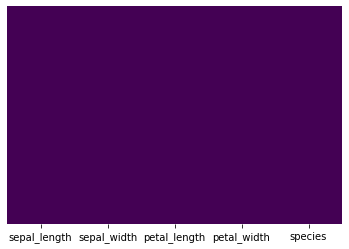

In [155]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis') #there are no null values in the dataset

In [156]:
duplicate = data[data.duplicated()]
duplicate

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [157]:
data.drop_duplicates()
# data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


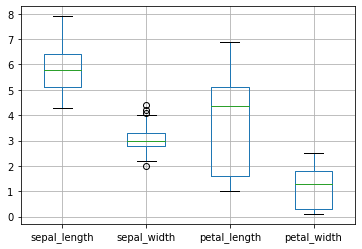

In [158]:
data.boxplot() #sepal width column has outliers

### Removing outliers using 5 number summary 

In [159]:
q1, q3= np.percentile(data.sepal_width, [25,75]) #gives 25th and 75 percentile of total_bill column
print(q1, q3)

2.8 3.3


In [160]:
iqr= q3-q1
lower_fence= q1-(1.5*iqr)
upper_fence= q3+(1.5*iqr)

In [161]:
data=data[data.sepal_width<=upper_fence] #data will contain the rows for which the value of “sepal_width” column is <=upper_fence.
data=data[data.sepal_width>=lower_fence]

In [162]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#Exploratory Data Analysis (EDA)

In [163]:
data.shape

(146, 5)

In [164]:
data.info() #No variable column has null/missing values. Data has only float and integer values except target variable

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  146 non-null    float64
 1   sepal_width   146 non-null    float64
 2   petal_length  146 non-null    float64
 3   petal_width   146 non-null    float64
 4   species       146 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [165]:
data.describe() #mean and median doesn't have a lot of differnce hence no outliers in the data as such. 
                #moreover, the distribution of data is also consistent as the percentiles suggests

,sepal_length,sepal_width,petal_length,petal_width
count,146.000000,146.000000,146.000000,146.000000
mean,5.856849,3.040411,3.806849,1.220548
std,0.834093,0.397853,1.758042,0.759393
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [166]:
data.species.unique() #the dependent variable is discrete and have three classes

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [167]:
data.species.value_counts() #the data is balanced, has equal number of samples for each class

virginica     50
versicolor    49
setosa        47
Name: species, dtype: int64

In [168]:
# corr= data.corr() #used for regreesion
# corr.style.background_gradient(cmap='coolwarm')
# plt.figure(figsize=(6,4))
# sns.heatmap(df.corr(),cmap='Blues',annot=False) 

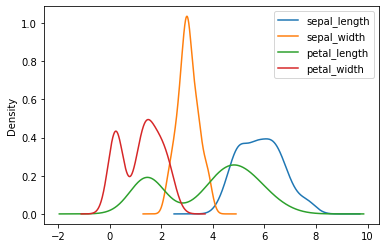

In [169]:
data.plot.kde() #only sepal width is normally distributed

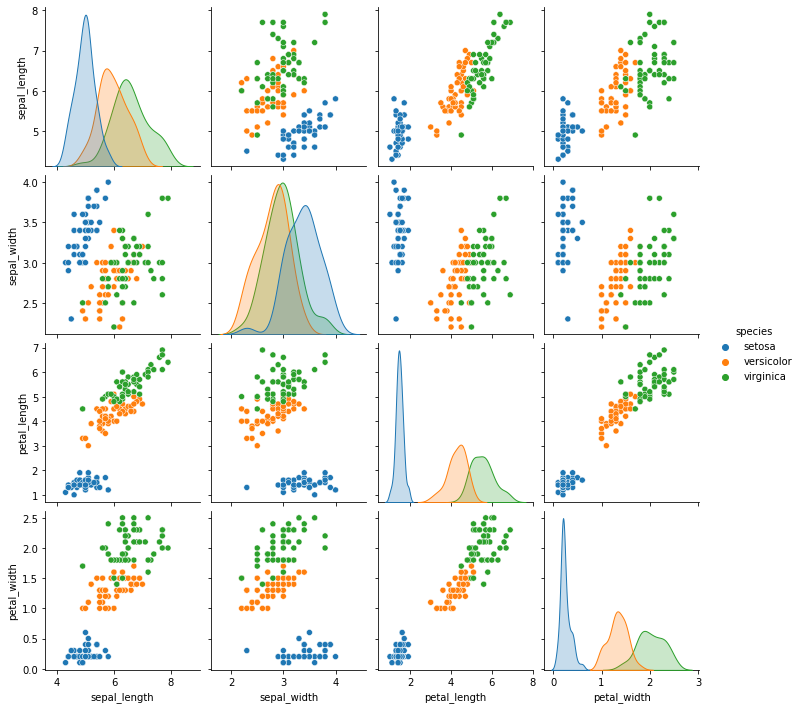

In [170]:
sns.pairplot(data, hue='species')

The above visualizations reveal that-


*   Setosa is well separated from the other two flower species
*   Virginica is the longest flower and setosa is the shortest



#Modelling

In [171]:
# Divding the dataset into features and target

data1 = data.values #converting each entry into a list
X = data1[:,0:4] #when we have list of lists. The first argument slices the lists inside the list and the second argument slices each list element
Y = data1[:,4]

"""Another way"""

# X = data.drop(['Id', 'Species'], axis=1)
# y = data['Species']

'Another way'

In [172]:
"""   """
# for ind,elem in enumerate(np.unique(Y)):
#   Y=np.where(Y==elem,ind,Y)

# Y=Y.astype('int')

'   '

In [173]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.2)

In [174]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# print(x_train)


## Using KNN for classification

In [175]:
y_train

array(['virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'setosa', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'virg

In [176]:
from sklearn.neighbors import KNeighborsClassifier

model= KNeighborsClassifier(n_neighbors=7)
model.fit(x_train, y_train)

pred= model.predict(x_test)
accuracy= accuracy_score(y_test, pred)
accuracy

0.9333333333333333

In [177]:
#Let's try out with different number of nearest neighbors to be considered for classification
nn=[]
accuracy=[]
for i in range(1, 25):

  model= KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train, y_train)

  pred= model.predict(x_test)

  accuracy.append(accuracy_score(y_test, pred))
  nn.append(i)

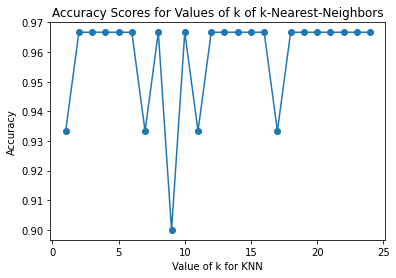

In [178]:
plt.plot(nn, accuracy, 'o-')  
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

##Logistc Regression

In [179]:
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression(random_state=0)
logreg.fit(x_train, y_train)

logreg.predict(x_test)
logregAcc=accuracy_score(y_test, pred)
logregAcc

0.9666666666666667

##SVM

In [180]:
from sklearn import svm
sep= svm.SVC()

sep.fit(x_train, y_train)

pred=sep.predict(x_test)

svmACC= accuracy_score(y_test, pred)
svmACC

0.9666666666666667

In [181]:
# A detailed classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



#Decision Tree

In [182]:
from sklearn import tree
decisionTree = tree.DecisionTreeClassifier()
decisionTree = decisionTree.fit(x_train, y_train)

In [183]:
y_pred=decisionTree.predict(x_test)

[Text(0.5416666666666666, 0.9285714285714286, 'X[3] <= -0.563\ngini = 0.666\nsamples = 116\nvalue = [38, 37, 41]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'X[3] <= 0.678\ngini = 0.499\nsamples = 78\nvalue = [0, 37, 41]'),
 Text(0.4166666666666667, 0.6428571428571429, 'X[2] <= 0.868\ngini = 0.142\nsamples = 39\nvalue = [0, 36, 3]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= -1.064\ngini = 0.1\nsamples = 38\nvalue = [0, 36, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'X[3] <= 0.155\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.35714285714285715, 'X[1] <= -2.05\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.4166666666666667, 0.21428571428571427, 'X[3] <= 0.025\ngini = 0.5\nsamples = 2\nvalue = [0

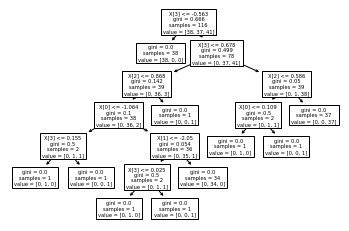

In [184]:
tree.plot_tree(decisionTree)

In [185]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9333333333333333